In [53]:
import random
random.seed(123)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import math
import time
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
import scipy.stats as stats

In [54]:
sns.set_style("whitegrid")
#sns.set_palette('Set1')

In [55]:
df = pd.read_csv("../resources/data/discords/Earthquake3_WithoutCNN/24.FromJsontoRawstream_ANEWeaarthquake2_romania_Pre_CNNv2_Accumulate10secondsPredZERO_Ori.csv",header=None,names=['col0','col1','col2'],sep=",")

In [56]:
df.drop('col0', axis=1, inplace=True)
df.drop('col1', axis=1, inplace=True)

In [57]:
#Show for viewing
df.head(29420)

,col2
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [58]:
#Kich thuoc du lieu
print df.shape

(20130, 1)


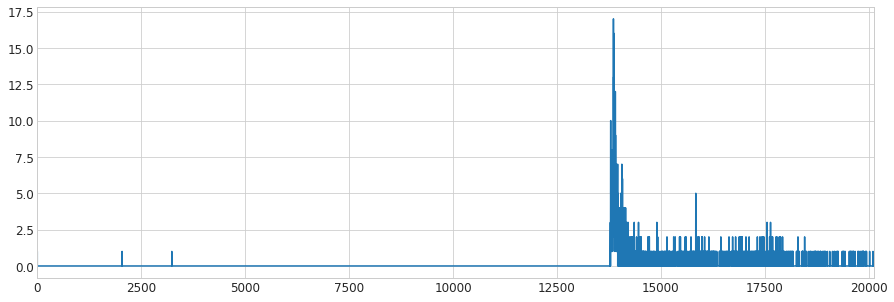

In [59]:
df['col2'].plot()
plt.show()

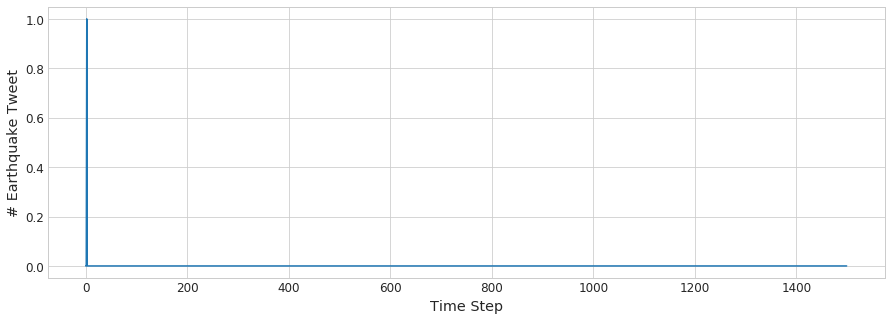

In [60]:
#tin hieu o trang thai khong co dong dat Without earthquake event situation
fig = plt.figure(figsize=(15,5))
df0 = df['col2'][0:1500]
plt.plot(df0)
plt.xlabel("Time Step")
plt.ylabel("# Earthquake Tweet")
plt.show()
pp = PdfPages("No earthquake")
pp.savefig(fig)
pp.close()

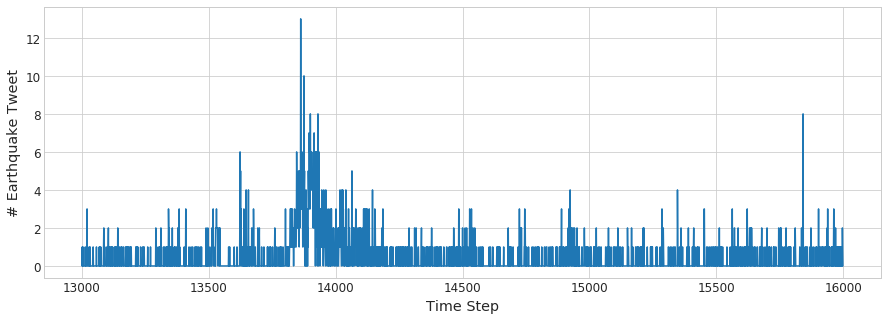

In [9]:
#isolate earthquake event [anomaly1]
fig1 = plt.figure(figsize=(15,5))
df1= df['col2'][13000:16000]
plt.plot(df1)
plt.xlabel("Time Step")
plt.ylabel("# Earthquake Tweet")
plt.show()
pp = PdfPages("earthquake event")
pp.savefig(fig1)
pp.close()

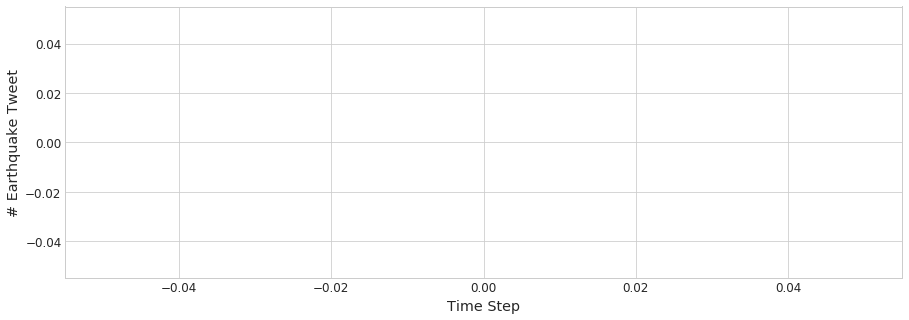

In [10]:
#isolate anomaly 2
fig2 = plt.figure(figsize=(15,5))
df2= df['col2'][28700:45000]
plt.plot(df2)
plt.xlabel("Time Step")
plt.ylabel("# Earthquake Tweet")
plt.show()
pp = PdfPages("earthquake event")
pp.savefig(fig2)
pp.close()

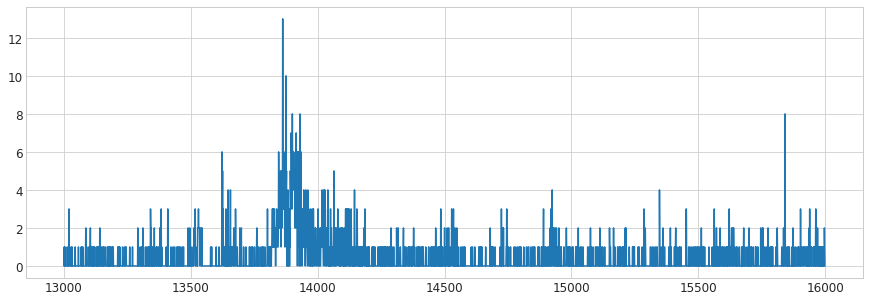

In [11]:
#isolate end sequence
df3= df['col2'][13000:16000]
plt.plot(df3)
plt.show()

In [12]:
df['anomaly'] = 0
df.head(28750)

,col2,anomaly
0,2,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,0
7,0,0
8,0,0
9,0,0


Size of test: 20147
Size of validation1: 1647
Size of validation2: 20147
Size of train: 15147
Total: 57088
Ratio of test: 0.352911
Ratio of validation1: 0.028850
Ratio of validation2: 0.352911
Ratio of train: 0.265327


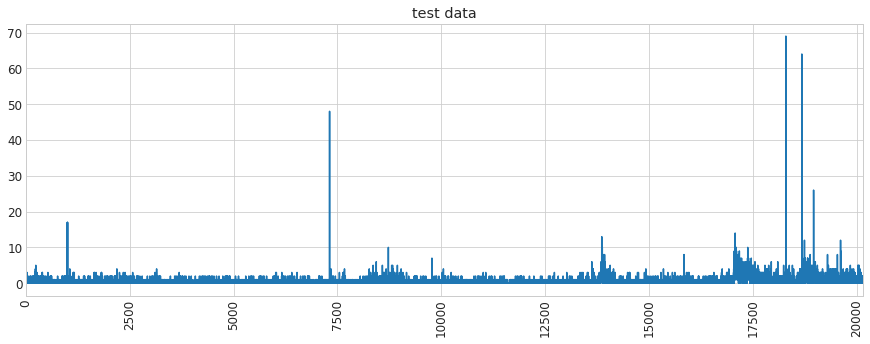

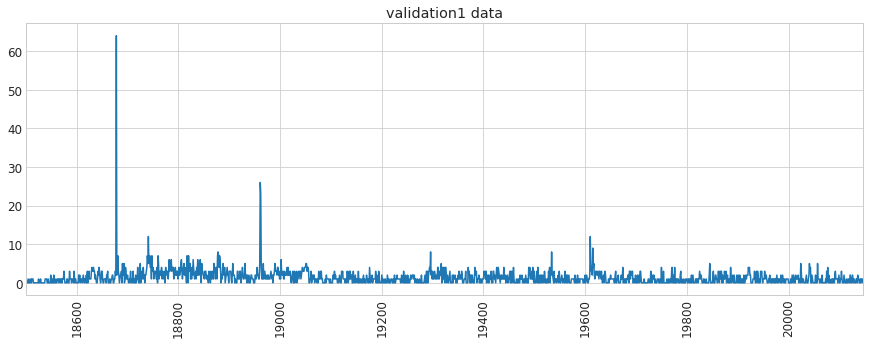

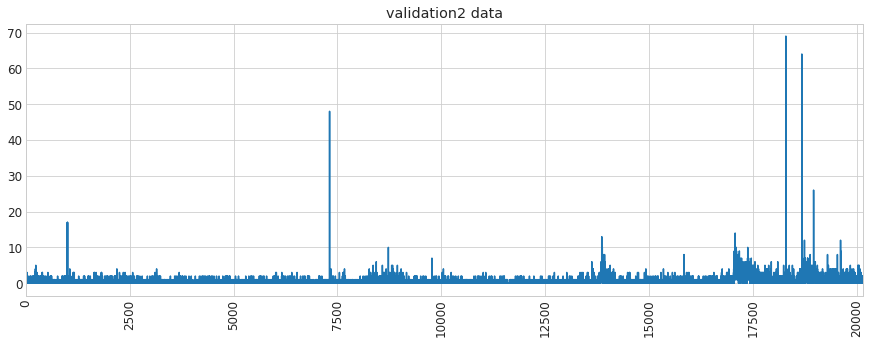

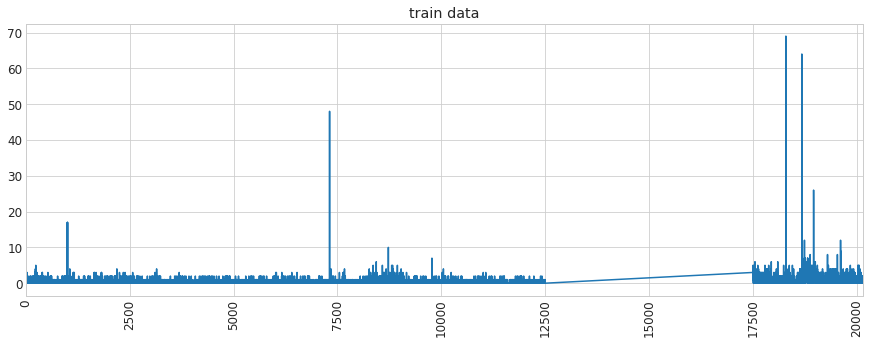

In [13]:
df_anomaly1 = df[12500:17500]
df_test = df

df_validation1= df[18500:]

df_not_train = df_anomaly1
df_train = df[~df.isin(df_not_train)].dropna()
df_validation2 = df_test

df_dict = {}
df_dict['train'] = df_train
df_dict['test'] = df_test
df_dict['validation1'] = df_validation1
df_dict['validation2'] = df_validation2

count = 0
for key in df_dict:
    print "Size of %s: %d"%(key,df_dict[key].shape[0])
    count += df_dict[key].shape[0]
print "Total: %d"%(count)

for key in df_dict:
    print "Ratio of %s: %f"%(key,float(df_dict[key].shape[0])/count)

    
for key in df_dict:
    df_tmp = df_dict[key]
    plt.figure()
    df_tmp['col2'].plot(figsize=(15,5))
    rows = df_tmp[df_tmp.anomaly.isin([1])].itertuples()
    for row in rows:
        print row
        plt.plot(row[0], row[1], 'r.', markersize=10.0)
    plt.xticks(rotation='vertical')
    plt.title("%s data"%(key))
    plt.show()

In [19]:
for key in df_dict:
    np.save("../resources/data/discords/Earthquake3_WithoutCNN/%s"%(key),df_dict[key])

In [20]:
#Earthquake detection start here
#Earthquake detection start here
#Earthquake detection start here
#Earthquake detection start here

In [21]:
data_folder = "../resources/data/discords/Earthquake3_WithoutCNN/"

In [22]:
#load training data
train_predictions = np.load(data_folder+"train_predictions.npy")
train_true = np.load(data_folder+"train_true.npy")
print train_predictions.shape
print train_true.shape

(15145, 1)
(15145,)


In [23]:
#load validation2 data
validation2_predictions = np.load(data_folder+"validation2_predictions.npy")
validation2_true = np.load(data_folder+"validation2_true.npy")
validation2_labels = np.load(data_folder+"validation2_labels.npy")
print np.shape(validation2_predictions)
print np.shape(validation2_true)
print np.shape(validation2_labels)
validation2_labels = np.reshape(validation2_labels,[len(validation2_labels),np.shape(validation2_labels)[1]])
print np.shape(validation2_labels)

(20145, 1)
(20145,)
(20145, 1, 1)
(20145, 1)


In [24]:
# load test data
test_predictions = np.load(data_folder+"test_predictions.npy")
test_true = np.load(data_folder+"test_true.npy")
test_labels = np.load(data_folder+"test_labels.npy")
print np.shape(test_predictions)
print np.shape(test_true)
test_labels = np.reshape(test_labels,[len(test_labels),np.shape(test_labels)[1]])
print np.shape(test_labels)

(20145, 1)
(20145,)
(20145, 1)


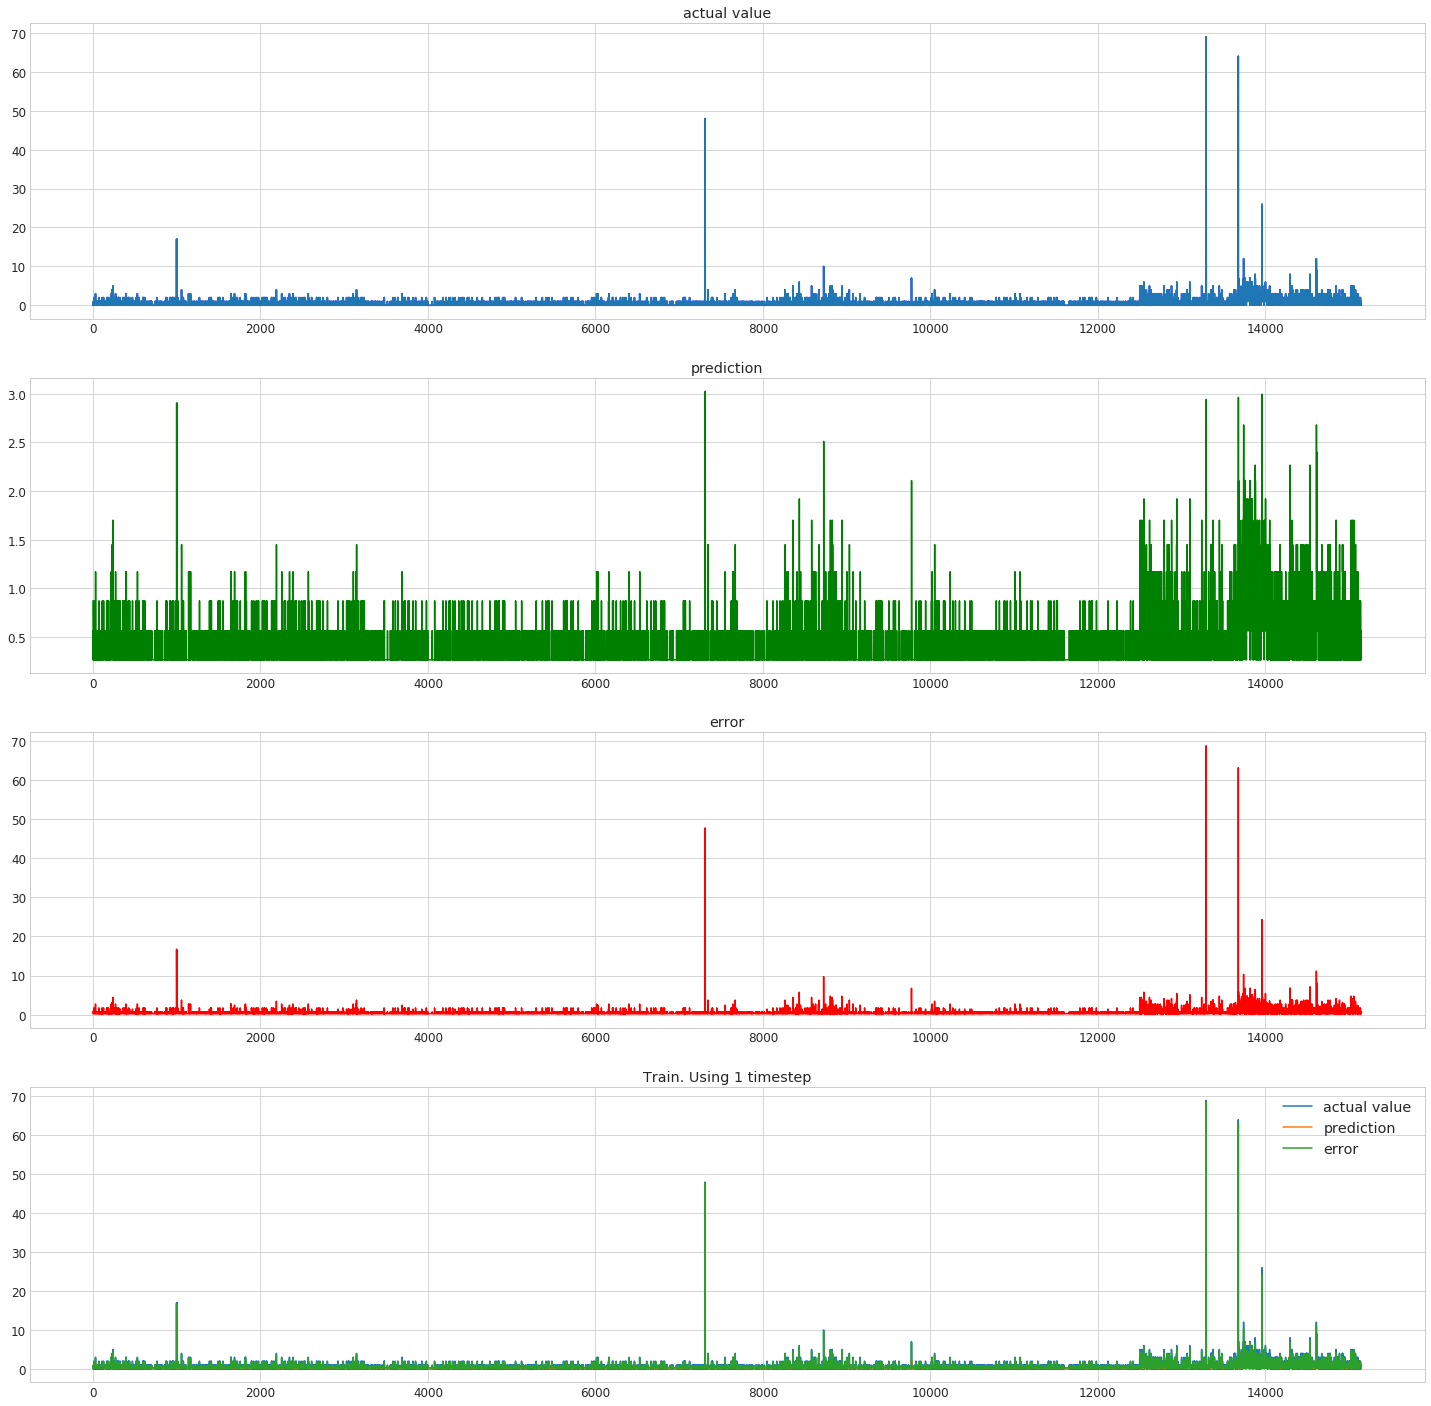

In [25]:
plt.figure(figsize=(25,25))
plt.subplot(411)
plt.plot(train_true, 'b-', label= 'actual value')
plt.title("actual value")
plt.plot(train_true,label='actual value')

plt.subplot(412)
plt.plot(train_predictions[:,0], 'g-', label='prediction')
plt.title("prediction")

plt.subplot(413)
plt.plot(abs(train_true - train_predictions[:,0]),'r-',label='error')
plt.title("error")

plt.subplot(414)
plt.plot(train_true,label='actual value')
plt.plot(train_predictions[:,0],label='prediction')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.legend()
plt.title("Train. Using 1 timestep")

plt.show()

0.5511170424262696
1.0663304831048015


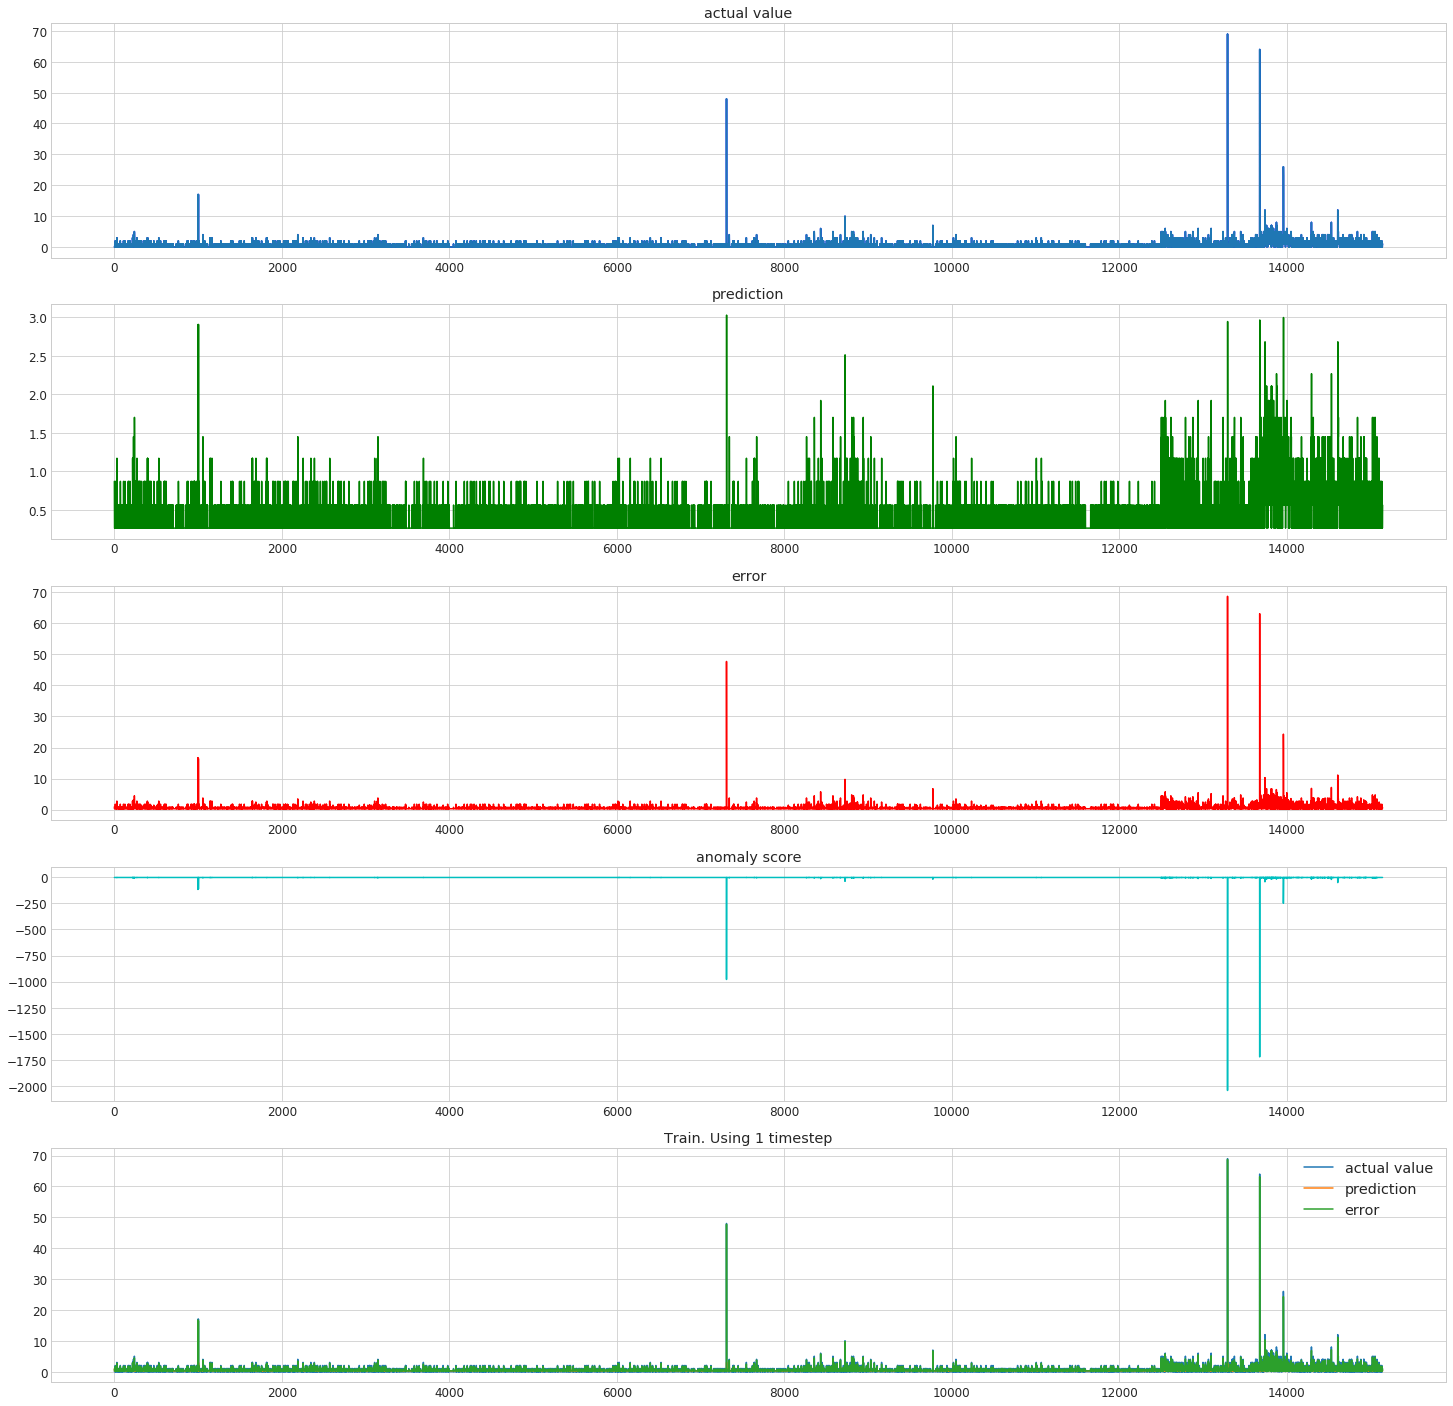

In [26]:
#error vectors
from scipy.stats import norm

train_error_vectors = np.zeros(np.shape(train_predictions))
n_cols = np.shape(train_predictions)[1]
for i in range(n_cols):
    train_error_vectors[:,i] =  np.abs(train_true -train_predictions[:,i])

#ERROR DIMENSION
error_dimension = 1
train_error_vectors = train_error_vectors[:,0:error_dimension]
mean = np.mean(train_error_vectors)
std = np.std(train_error_vectors)
print mean
print std
p_values= norm(loc=mean, scale=std).logpdf(train_error_vectors)

plt.figure(figsize=(25,25))
plt.subplot(511)
plt.plot(train_true, 'b-', label= 'actual value')
plt.title("actual value")
plt.plot(train_true,label='actual value')

plt.subplot(512)
plt.plot(train_predictions[:,0], 'g-', label='prediction')
plt.title("prediction")

plt.subplot(513)
plt.plot(abs(train_true - train_predictions[:,0]),'r-',label='error')
plt.title("error")

plt.subplot(515)
plt.plot(train_true,label='actual value')
plt.plot(train_predictions[:,0],label='prediction')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.legend()
plt.title("Train. Using 1 timestep")

plt.subplot(514)
plt.plot(p_values,'c-')
plt.title("anomaly score")
plt.show()

train_errors_1 = train_true - train_predictions[:,0]

In [63]:
v2_error_vectors = np.zeros(np.shape(validation2_predictions))
for i in range(n_cols):
    v2_error_vectors[:,i] =  np.abs(validation2_true -validation2_predictions[:,i])

v2_error_vectors = v2_error_vectors[:,0:error_dimension]
v2_p_values= norm(loc=mean, scale=std).logpdf(v2_error_vectors)

print 
test_error_vectors = np.zeros(np.shape(test_predictions))
for i in range(n_cols):
    test_error_vectors[:,i] =  test_true -test_predictions[:,i]
test_error_vectors = test_error_vectors[:,0:error_dimension]
test_p_values= norm(loc=mean, scale=std).logpdf(test_error_vectors)
test_true_anomalies = np.where(test_labels[:,0]==1)

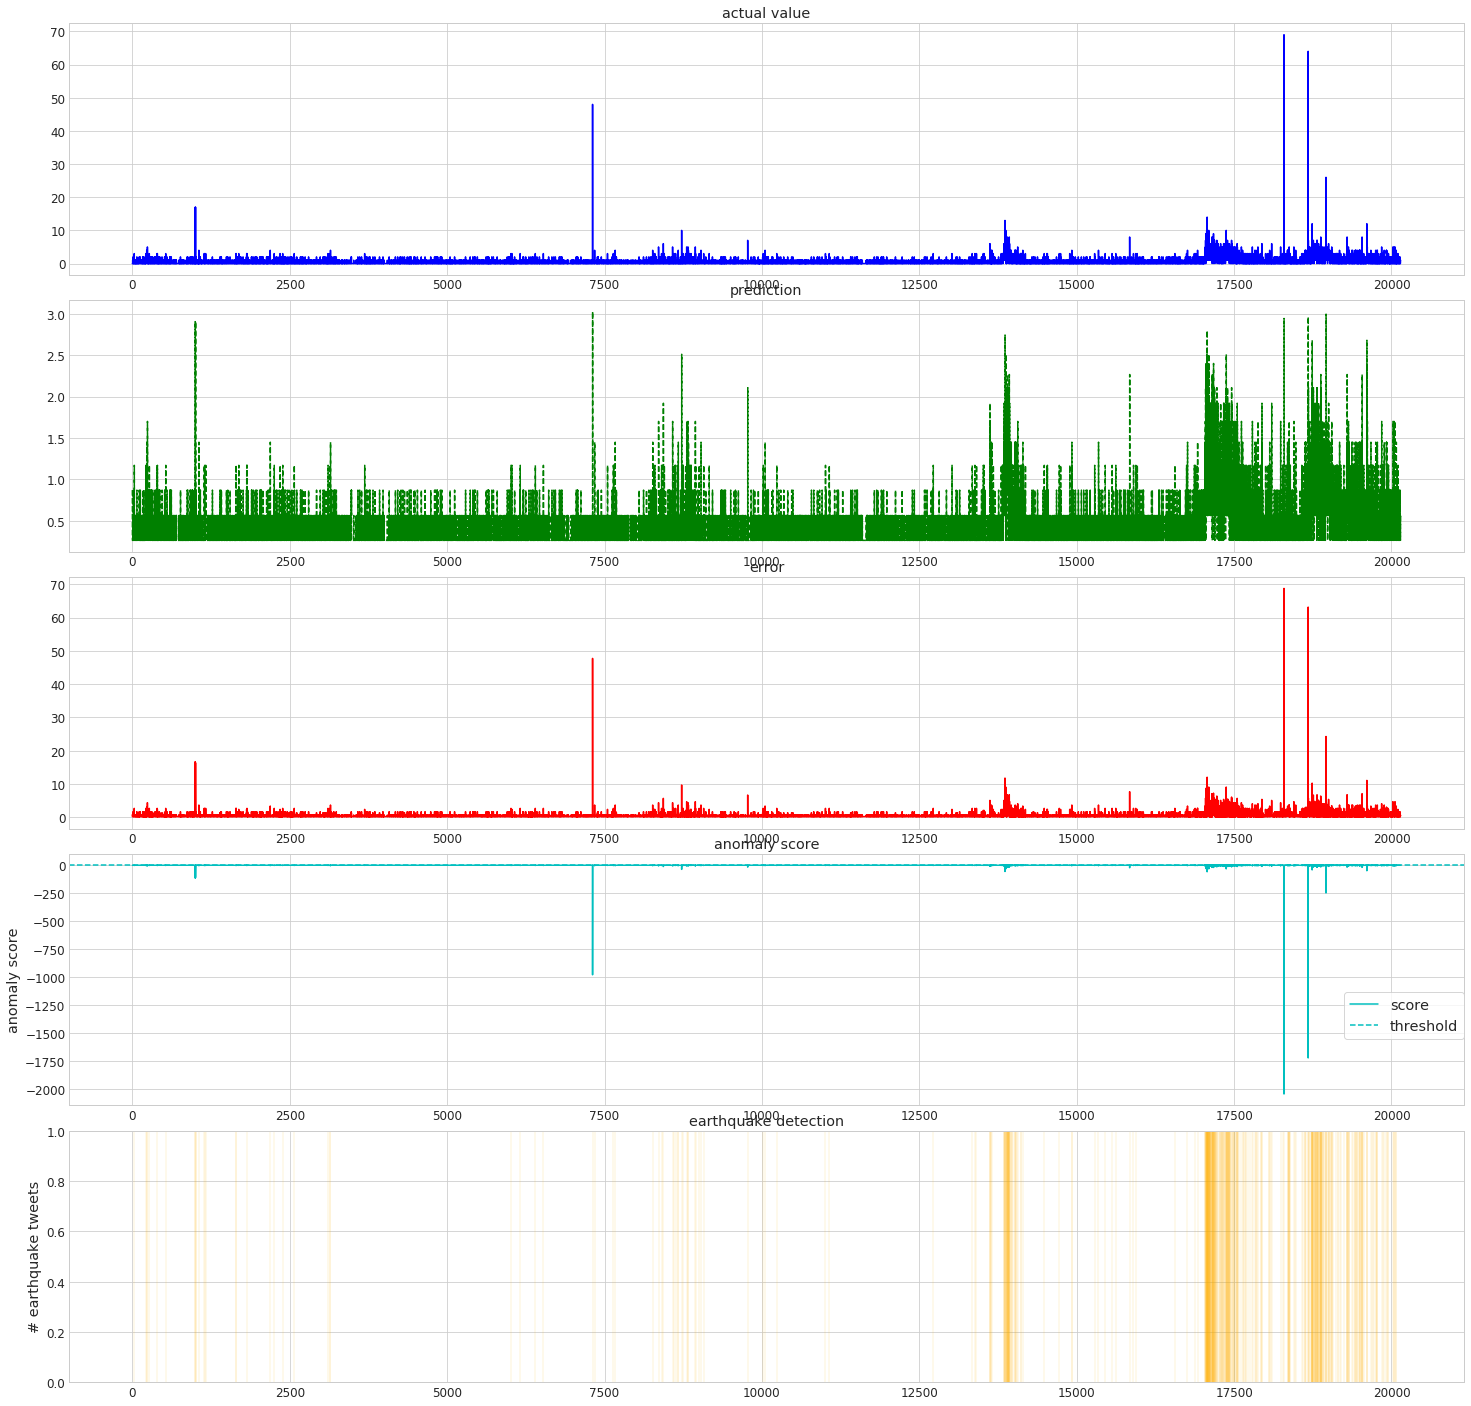

In [77]:
threshold_v2 = -3

f = plt.figure(figsize=(25,25))
plt.subplots_adjust(hspace=0.1)

v2_below_threshold = np.where(v2_p_values <= threshold_v2)

#print v2_below_threshold

ax1 = plt.subplot(511)
ax1.plot(validation2_true,label='actual value',color='b')
plt.title("actual value")

ax2 = plt.subplot(512,sharex=ax1)
ax2.plot(validation2_predictions[:,0],ls ='dashed',label='prediction',color='g')
plt.title("prediction")

ax3 = plt.subplot(513, sharex=ax1)
ax3.plot(abs(validation2_true - validation2_predictions[:,0]),label='error',color='r')
plt.title("error")

ax5 = plt.subplot(515, sharex=ax1)
for column in v2_below_threshold[0]:
    ax5.axvline(x=column,color=sns.xkcd_rgb["amber"],alpha=.1)
#for row in v2_true_anomalies:
#    plt.plot(row, validation2_true[row], 'r.', markersize=20.0)

plt.ylabel("# earthquake tweets")
plt.title("earthquake detection")


#plot v2 log PD
ax4 = plt.subplot(514, sharex=ax1)
ax4.plot(v2_p_values,label='score',color='c')
ax4.axhline(y=threshold_v2,ls='dashed',label='threshold',color='c')
ax4.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("anomaly score")
plt.title("anomaly score")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
# xticklabels = ax1.get_xticklabels()
# plt.setp(xticklabels, visible=False)
# plt.xlabel("time")
plt.show()
pp = PdfPages('earthquake3 tweets_v2 without CNN.pdf')
pp.savefig(f)
pp.close()

[   30   217   228   239   269   394   530   998   999  1004  1005  1057
  1141  1149  1165  1645  1649  1821  2190  2253  2388  2571  3108  3139
  3147  6014  6160  6400  6528  7310  7311  7343  7640  7669  8265  8358
  8406  8434  8435  8581  8599  8629  8664  8671  8725  8726  8748  8805
  8826  8832  8942  8943  8946  9003  9032  9075  9774  9775 10020 10050
 10236 11009 11069 12721 13340 13382 13408 13622 13624 13625 13626 13637
 13646 13655 13845 13850 13853 13856 13857 13861 13866 13868 13874 13876
 13877 13882 13886 13891 13894 13895 13896 13899 13900 13903 13904 13905
 13908 13911 13914 13916 13918 13919 13920 13922 13923 13926 13927 13928
 13929 13932 13933 13944 13952 13960 13972 13980 13982 14016 14023 14027
 14029 14039 14049 14063 14064 14114 14123 14144 14484 14723 14918 14923
 15285 15346 15451 15562 15621 15841 15842 15902 15938 16560 16760 16881
 16920 17037 17043 17044 17047 17050 17051 17052 17055 17056 17058 17060
 17062 17064 17065 17066 17067 17069 17071 17072 17

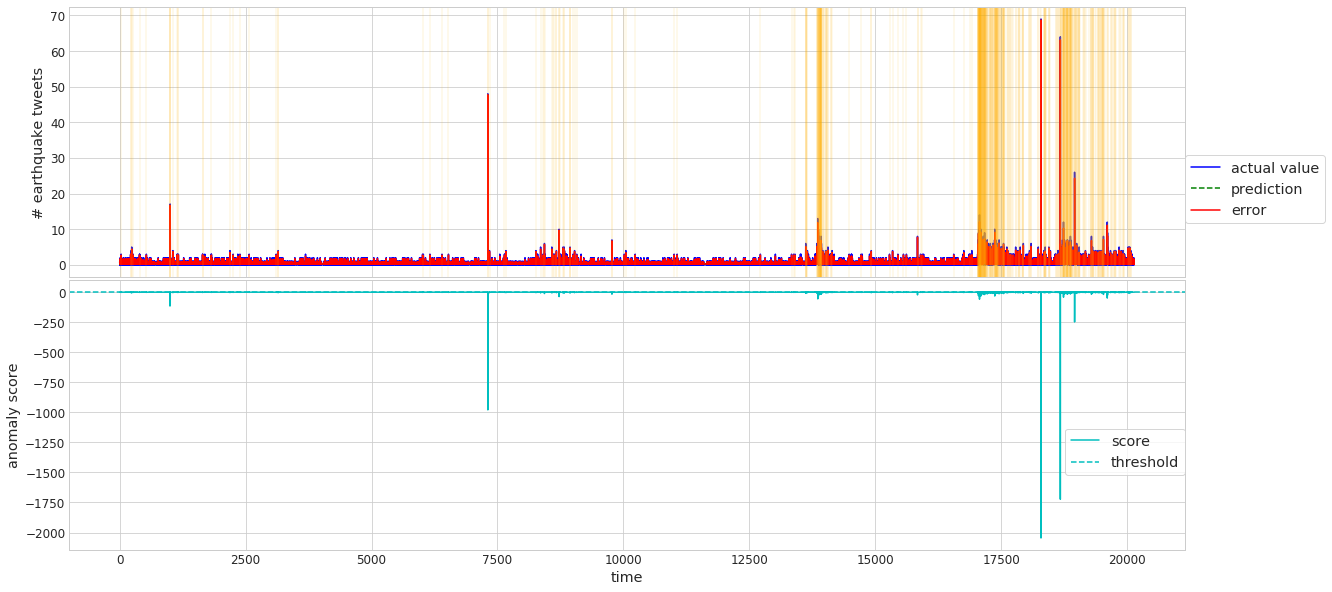

In [80]:
test_below_threshold = np.where(test_p_values <= threshold_v2)
print test_below_threshold[0]
#plot test data
f = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.01)

ax1 = plt.subplot(211)
ax1.plot(test_true,label='actual value',color='b')
ax1.plot(test_predictions[:,0],ls ='dashed',label='prediction',color='g')
ax1.plot(abs(test_true - test_predictions[:,0]),label='error',color='r')
for column in test_below_threshold[0]:
    ax1.axvline(x=column,color=sns.xkcd_rgb["amber"],alpha=0.1)
#for row in test_true_anomalies:
#    plt.plot(row, test_true[row], 'r.', markersize=20.0)
ax1.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("# earthquake tweets")
#plt.title("Test. Using 1 timestep")

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(test_p_values,label='score',color='c')
ax2.axhline(y=threshold_v2,ls='dashed',label='threshold',color='c')
ax2.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("anomaly score")
#plt.title("test p-values")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlabel("time")
plt.show()
pp = PdfPages('Earthquake_test.pdf')
pp.savefig(f)
pp.close()

In [81]:
df = pd.read_csv("../resources/data/discords/Earthquake3_WithoutCNN/FromJsontoRawstream_ANEWeaarthquake2_Pre_CNN_Accumulate10secondsPredZERO_nerejuromania.csv",header=None,names=['col0','col1','col2'],sep=",")

In [82]:
df['col1'][13340 ]

'12/27/2016 22:08:15'